# Inference with pre-trained model

In [20]:
from rfdetr import RFDETRBase
from rfdetr.util.coco_classes import COCO_CLASSES
import supervision as sv
import numpy as np
from PIL import Image

model = RFDETRBase(pretained_weights='../models/baseline/rf-detr-base.pth')
history = []

def callback2(data):
    history.append(data)

model.callbacks["on_fit_epoch_end"].append(callback2)

model.train(dataset_dir='../data/sorghum', epochs=15, batch_size=2)

Loading pretrain weights


num_classes mismatch: model has 90 classes, but your dataset has 3 classes
reinitializing your detection head with 3 classes.


Not using distributed mode
git:
  sha: 1ea1d68989976568ff512f0696563b5c57753963, status: clean, branch: main

Namespace(num_classes=3, grad_accum_steps=4, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=2, weight_decay=0.0001, epochs=15, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-base.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[2, 5, 8, 11], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim=256, sa_nheads=8, ca_nheads=16, num_queries=300, group_detr=13, two_stage=True, projector_scale=['P4'], lite_refpoint_r

Epoch: [0]  [ 0/23]  eta: 0:12:40  lr: 0.000100  class_error: 41.03  loss: 11.8291 (11.8291)  loss_ce: 1.1019 (1.1019)  loss_bbox: 1.0296 (1.0296)  loss_giou: 0.6618 (0.6618)  loss_ce_0: 1.0036 (1.0036)  loss_bbox_0: 1.2886 (1.2886)  loss_giou_0: 0.8167 (0.8167)  loss_ce_1: 1.1140 (1.1140)  loss_bbox_1: 1.0359 (1.0359)  loss_giou_1: 0.6233 (0.6233)  loss_ce_enc: 0.9911 (0.9911)  loss_bbox_enc: 1.3149 (1.3149)  loss_giou_enc: 0.8476 (0.8476)  loss_ce_unscaled: 1.1019 (1.1019)  class_error_unscaled: 41.0256 (41.0256)  loss_bbox_unscaled: 0.2059 (0.2059)  loss_giou_unscaled: 0.3309 (0.3309)  cardinality_error_unscaled: 1424.5000 (1424.5000)  loss_ce_0_unscaled: 1.0036 (1.0036)  loss_bbox_0_unscaled: 0.2577 (0.2577)  loss_giou_0_unscaled: 0.4083 (0.4083)  cardinality_error_0_unscaled: 3275.5000 (3275.5000)  loss_ce_1_unscaled: 1.1140 (1.1140)  loss_bbox_1_unscaled: 0.2072 (0.2072)  loss_giou_1_unscaled: 0.3117 (0.3117)  cardinality_error_1_unscaled: 2243.5000 (2243.5000)  loss_ce_enc_unsca

Test:  [ 0/27]  eta: 0:00:47  class_error: 0.00  loss: 7.8060 (7.8060)  loss_ce: 0.9727 (0.9727)  loss_bbox: 0.5031 (0.5031)  loss_giou: 0.5158 (0.5158)  loss_ce_0: 1.1562 (1.1562)  loss_bbox_0: 0.3745 (0.3745)  loss_giou_0: 0.4819 (0.4819)  loss_ce_1: 0.9648 (0.9648)  loss_bbox_1: 0.4832 (0.4832)  loss_giou_1: 0.5067 (0.5067)  loss_ce_enc: 1.3125 (1.3125)  loss_bbox_enc: 0.2364 (0.2364)  loss_giou_enc: 0.2982 (0.2982)  loss_ce_unscaled: 0.9727 (0.9727)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.1006 (0.1006)  loss_giou_unscaled: 0.2579 (0.2579)  cardinality_error_unscaled: 23.5000 (23.5000)  loss_ce_0_unscaled: 1.1562 (1.1562)  loss_bbox_0_unscaled: 0.0749 (0.0749)  loss_giou_0_unscaled: 0.2410 (0.2410)  cardinality_error_0_unscaled: 105.0000 (105.0000)  loss_ce_1_unscaled: 0.9648 (0.9648)  loss_bbox_1_unscaled: 0.0966 (0.0966)  loss_giou_1_unscaled: 0.2534 (0.2534)  cardinality_error_1_unscaled: 31.0000 (31.0000)  loss_ce_enc_unscaled: 1.3125 (1.3125)  loss_bbox_en

KeyboardInterrupt: 

In [14]:
ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"../data/sorghum/test",
    annotations_path=f"../data/sorghum/test/_annotations.coco.json",
)

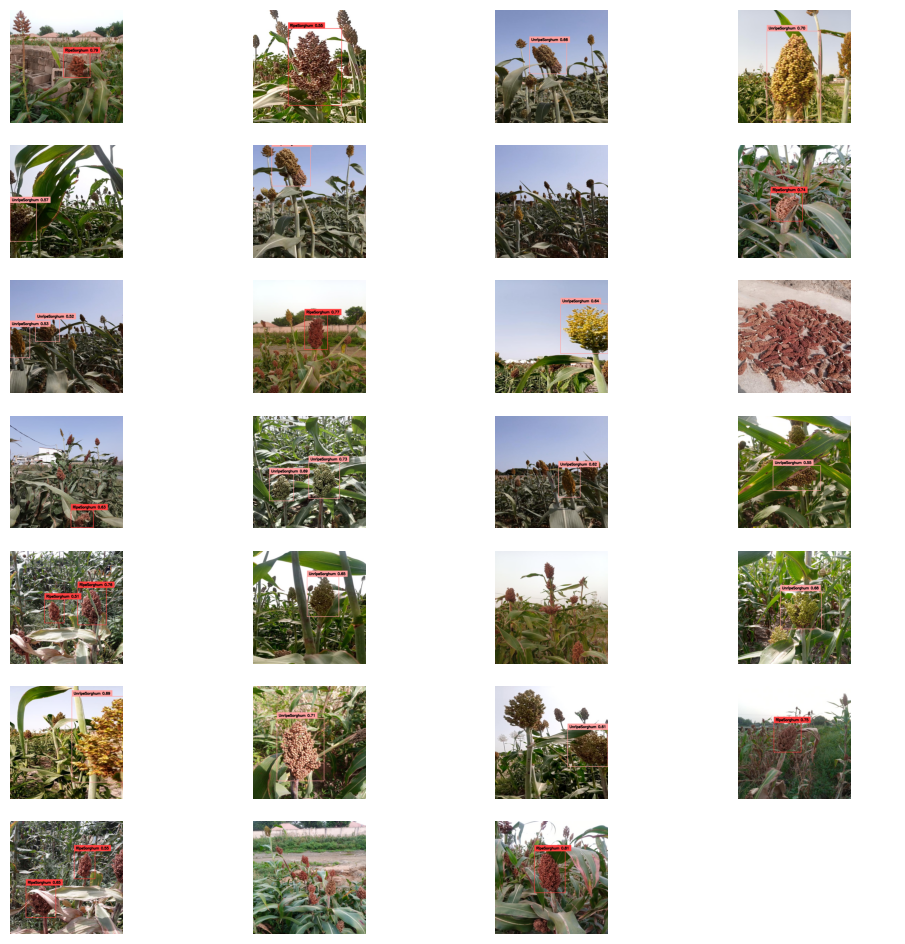

In [17]:
detections_images = []

for i in range(len(ds)):
    path, image, annotations = ds[i]
    image = Image.open(path)

    detections = model.predict(image, threshold=0.5)

    text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
    thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

    bbox_annotator = sv.BoxAnnotator(thickness=thickness)
    label_annotator = sv.LabelAnnotator(
        text_color=sv.Color.BLACK,
        text_scale=text_scale,
        text_thickness=thickness,
        smart_position=True)

    detections_labels = [
        f"{ds.classes[class_id]} {confidence:.2f}"
        for class_id, confidence
        in zip(detections.class_id, detections.confidence)
    ]

    detections_image = image.copy()
    detections_image = bbox_annotator.annotate(detections_image, detections)
    detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

    detections_images.append(detections_image)

sv.plot_images_grid(images=detections_images, grid_size=(7, 4))

100%|██████████| 27/27 [01:19<00:00,  2.96s/it]


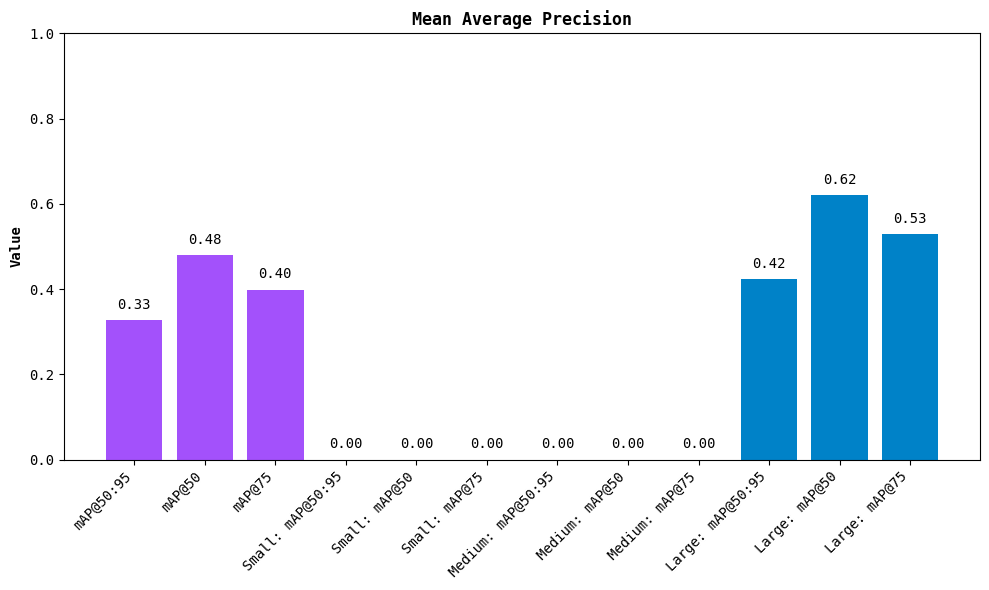

In [18]:
import supervision as sv
from tqdm import tqdm
from supervision.metrics import MeanAveragePrecision

targets = []
predictions = []

for path, image, annotations in tqdm(ds):
    image = Image.open(path)
    detections = model.predict(image, threshold=0.5)

    targets.append(annotations)
    predictions.append(detections)

map_metric = MeanAveragePrecision()
map_result = map_metric.update(predictions, targets).compute()

map_result.plot()

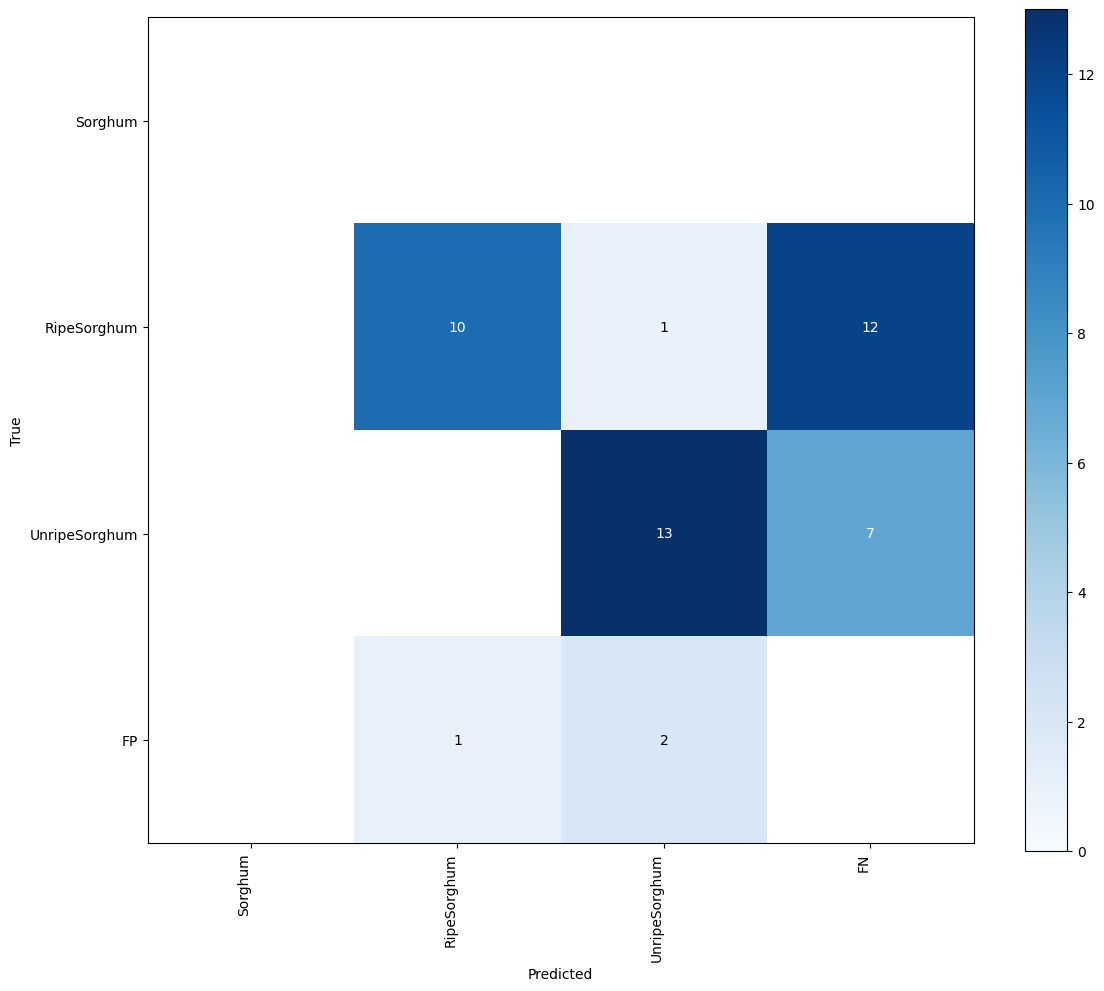

In [19]:
confusion_matrix = sv.ConfusionMatrix.from_detections(
    predictions=predictions,
    targets=targets,
    classes=ds.classes
)

_ = confusion_matrix.plot()